# Checkpoint 1
## (Do not remove any comments that start with"# @@@".)

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [104]:
df = pd.read_csv("states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset?

In [105]:
# @@@ 1
# Your Code
print(df['YEAR'].unique())
print(df['YEAR'].nunique())

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [106]:
# @@@ 2
df_michigan = df[df['STATE'] == 'MICHIGAN']
df_ohio = df[df['STATE'] == 'OHIO']
print(df_michigan['AVG_MATH_4_SCORE'].mean())
print(df_ohio['AVG_MATH_4_SCORE'].mean())

234.36363636363637
239.45454545454547


Find the average for your chosen test across all states in 2019

In [107]:
# @@@ 3
df_2019 = df[df['YEAR'] == 2019]
print(df_2019['AVG_MATH_4_SCORE'].mean())

239.9433962264151


For each state, find a maximum value for your chosen test score

In [108]:
# @@@ 4
df.groupby('STATE')['AVG_MATH_4_SCORE'].max()

,AVG_MATH_4_SCORE
STATE,
ALABAMA,233.0
ALASKA,237.0
ARIZONA,240.0
ARKANSAS,240.0
CALIFORNIA,235.0
COLORADO,247.0
CONNECTICUT,245.0
DELAWARE,243.0
DISTRICT_OF_COLUMBIA,235.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [125]:
# @@@ 5
df1 = df.dropna(subset=['ENROLL']).copy()
df1['instruction_exp_per_student'] = df1['INSTRUCTION_EXPENDITURE'] / df1['ENROLL']
df1['instruction_exp_per_student']

,instruction_exp_per_student
51,2.149957
52,4.084957
53,2.334609
54,2.513521
55,2.978904
...,...
1270,6.968962
1271,6.538322
1272,6.519038
1273,6.715840


Feature engineering justification: **<to get the total expenditure per student, I excluded rows where enrollment was unavailable and from that new data, divided total expenditure with enrollment number\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

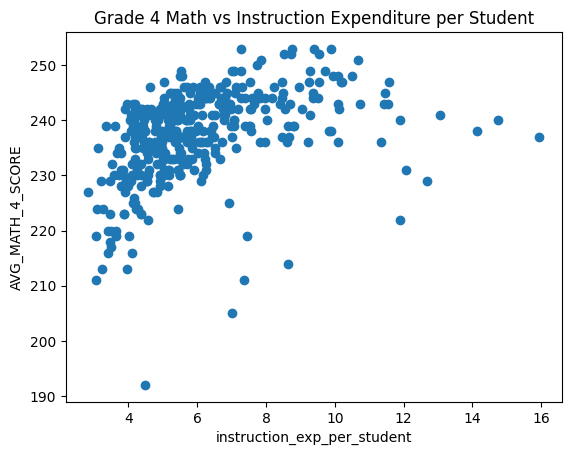

In [122]:
# @@@ 6
plt.scatter(df1['instruction_exp_per_student'], df1['AVG_MATH_4_SCORE'])
plt.xlabel('instruction_exp_per_student')
plt.ylabel('AVG_MATH_4_SCORE')
plt.title('Grade 4 Math vs Instruction Expenditure per Student')
plt.show()

**<we see a generally positive relationship between two variables, likely meaning that increased instruction expenditure leads to higher math scores for 4th grades pretty well.>**

**Visualization 2**

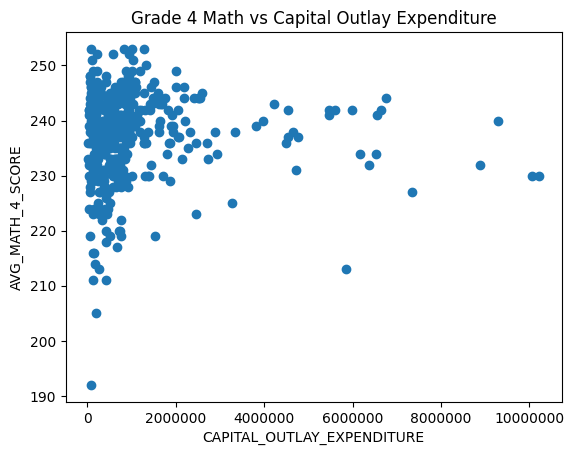

In [123]:
# @@@ 7
plt.scatter(df1['CAPITAL_OUTLAY_EXPENDITURE'], df1['AVG_MATH_4_SCORE'])
plt.xlabel('CAPITAL_OUTLAY_EXPENDITURE')
plt.ylabel('AVG_MATH_4_SCORE')
plt.title('Grade 4 Math vs Capital Outlay Expenditure')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**<there is also a positive relationship, here, but not as much as the previous one. so we can say that capital outlay expenditure has less significant effect.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# @@@ 8
df_clean = df1[['instruction_exp_per_student',
                'CAPITAL_OUTLAY_EXPENDITURE',
                'AVG_MATH_4_SCORE']].dropna()

X = df_clean[['instruction_exp_per_student', 'CAPITAL_OUTLAY_EXPENDITURE']]
y = df_clean['AVG_MATH_4_SCORE']

In [114]:
# @@@ 9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 100, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [115]:
# @@@ 10
# import your sklearn class here
import sklearn
from sklearn.linear_model import LinearRegression

In [116]:
# @@@ 11
# create your model here
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [119]:
# @@@ 12
print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

228.7604070382122
[1.40000742e+00 1.96924840e-07]
0.1923206034353696
0.19019548132286246
5.88742789143592
8.02391890847691


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

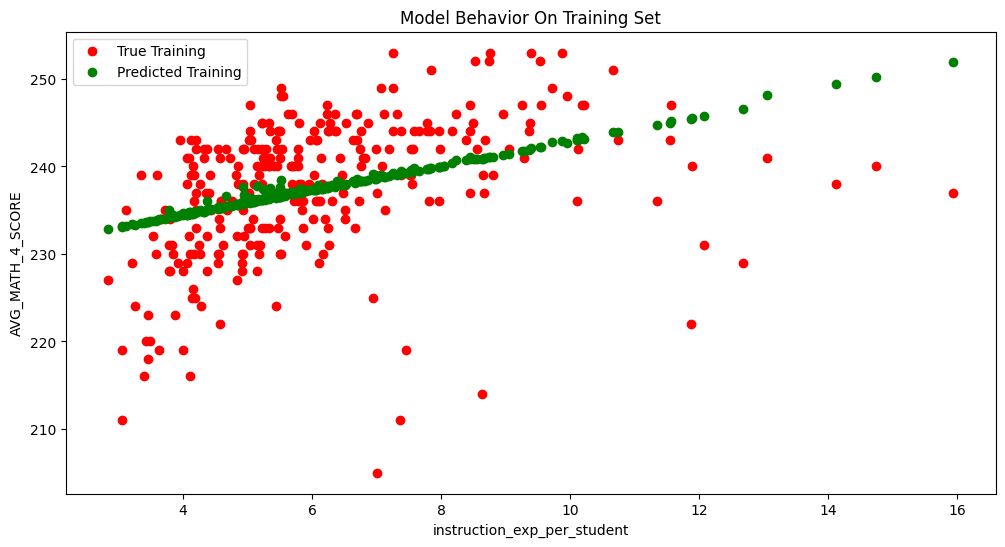

In [120]:
# @@@ 13

col_name1 = 'instruction_exp_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name1], y_train, color = "red")
plt.scatter(X_train[col_name1], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name1)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

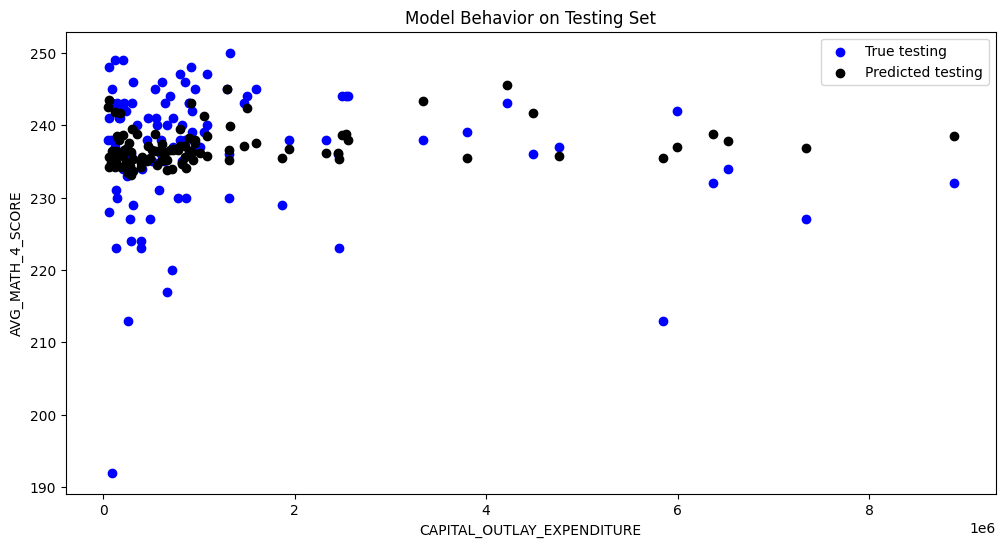

In [121]:
# @@@ 14


col_name2 = 'CAPITAL_OUTLAY_EXPENDITURE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name2], y_test, color = "blue")
plt.scatter(X_test[col_name2], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name2)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")